In [10]:
from montecarlo import Die,Game,Analyzer
import pandas as pd
import matplotlib.pyplot as plt

# SCENARIO 1

In [11]:
faces = ["H","T"]
f_coin1 = Die(faces)
f_coin2 = Die(faces)
f_coin3 = Die(faces)     
all_fair = Game([f_coin1,f_coin2,f_coin3])
all_fair.play(1000)
all_fair_analyze = Analyzer(all_fair)
all_fair_jackpot = all_fair_analyze.jackpot()
all_fair_jackpot_freq = all_fair_jackpot/1000

uf_coin1 = Die(faces)
uf_coin1.change_weight("T",5)
uf_coin2 = Die(faces)
uf_coin2.change_weight("T",5)
mixed_fair = Game([f_coin1,uf_coin1,uf_coin2])
mixed_fair.play(1000)
mixed_fair_analyze = Analyzer(mixed_fair)
mixed_fair_jackpot = mixed_fair_analyze.jackpot()
mixed_fair_jackpot_freq = mixed_fair_jackpot/1000

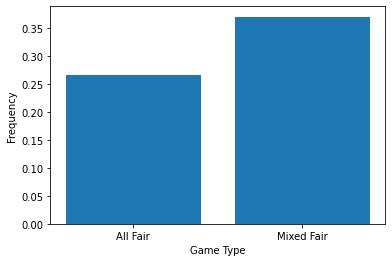

In [17]:
x = ['All Fair','Mixed Fair']
plt.bar(x,[all_fair_jackpot_freq, mixed_fair_jackpot_freq])
plt.xlabel('Game Type')
plt.ylabel('Frequency')
plt.show()

# Scenario 2

In [147]:
faces = [1,2,3,4,5,6]
all_fair_dice = []
for i in range(6):
    all_fair_dice.append(Die(faces))
dice_game1 = Game(all_fair_dice)
dice_game1.play(1000)
dice_game1_analyzer = Analyzer(dice_game1)
dice_game1_analyzer.combo()
dice_game1_combo = dice_game1_analyzer.combo_df
dice_game1_combo.sort_values(by= 'Combo Count',ascending=False,inplace=True)
combo_counts1 = [i[0] for i in (dice_game1_combo[:10]).values]
ten_freq_game1 = dice_game1_combo.index[:10].values

mixed_dice = []
for i in range(6):
    mixed_dice.append(Die(faces))
mixed_dice[1].change_weight(6,5)
mixed_dice[2].change_weight(6,5)
mixed_dice[3].change_weight(1,5)
dice_game2 = Game(mixed_dice)
dice_game2.play(1000)
dice_game2_analyzer = Analyzer(dice_game2)
dice_game2_analyzer.combo()
dice_game2_combo = dice_game2_analyzer.combo_df
dice_game2_combo.sort_values(by = 'Combo Count',ascending=False,inplace=True)
combo_counts2 = [i[0] for i in (dice_game2_combo[:10]).values]
ten_freq_game2 = dice_game2_combo[:10].index.values

In [148]:
ten_freq_game2 = [[str(x) for x in tup] for tup in ten_freq_game2]
ten_freq_game2 = [''.join(x) for x in ten_freq_game2]

ten_freq_game1 = [[str(x) for x in tup] for tup in ten_freq_game1]
ten_freq_game1 = [''.join(x) for x in ten_freq_game1]

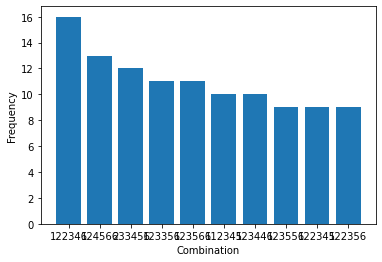

In [152]:
plt.bar(ten_freq_game1,combo_counts1)
plt.xlabel('Combination')
plt.ylabel('Frequency')
plt.show()
# ct = ct.reset_index(level=0)
# ct.columns
# len(ct) #1
#ten_freq_game1

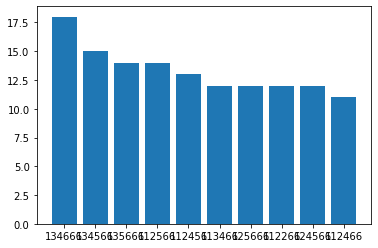

In [150]:
plt.bar(ten_freq_game2,combo_counts2)
plt.show()


# SCENARIO 3

In [5]:
letters_df = pd.read_csv('letter-freqs.csv', delimiter='\t',header=None)
letter_faces = letters_df[0]
letter_list = []
for i in range(5):
    letter_die = Die(letter_faces)
    letters_df.apply(lambda x: letter_die.change_weight(x[0],x[1]),axis = 1)
    letter_list.append(letter_die)
letter_game = Game(letter_list)
letter_game.play(1000)
letter_analyzer = Analyzer(letter_game)
letter_analyzer.combo()
print(letter_analyzer.combo_df.sort_values(by = 'Combo Count',ascending=False))

                                                        Combo Count
Position 1 Position 2 Position 3 Position 4 Position 5             
A          A          R          R          S                     3
I          L          N          P          S                     3
A          A          I          R          R                     3
E          R          R          R          S                     2
A          A          I          N          S                     2
...                                                             ...
B          E          I          I          J                     1
A          C          E          N          S                     1
C          D          I          N          S                     1
A          A          K          O          R                     1
E          O          T          T          U                     1

[960 rows x 1 columns]


In [158]:
pd.set_option('display.max_rows',100)
letter_analyzer.combo_df.head(100)

Combo Count
Position 1 Position 2 Position 3 Position 4 Position 5             
E          I          L          N          R                     1
B          H          K          O          W                     1
A          G          I          N          P                     1
C          C          E          P          U                     1
N          O          O          P          T                     1
C          D          I          R          T                     1
           I          O          S          S                     1
           G          P          S          T                     1
A          D          H          N          O                     1
C          D          N          S          T                     1
A          C          I          M          T                     1
I          K          N          O          S                     1
A          E          G          N          T                     1
C          M          O          O          T                     1
L          M          R          R          U                     1
G          O          O          O          T                     1
A          I          K          L          P                     1
           C          D          H          R                     1
E          E          O          S          T                     1
C          G          K          L          R                     1
           C          L          R          S                     1
A          E          K          O          R                     1
E          I          M          N          W                     1
A          A          C          I          I                     1
D          E          L          P          Y                     1
A          D          D          E          N                     1
F          F          N          T          T                     1
I          L          L          L          O                     1
A          R          S          W          Y                     1
           E          O          R          R                     1
           G          I          R          W                     1
           A          N          N          W                     1
E          M          R          S          T                     1
A          E          S          T          U                     1
           C          I          P          T                     1
           L          N          N          Y                     1
           E          F          I          T                     1
           A          I          U          W                     1
C          M          N          S          W                     1
I          M          N          O          R                     1
G          I          N          T          V                     2
A          C          N          O          P                     1
J          K          N          O          U                     1
A          C          G          L          U                     1
           G          N          N          R                     1
E          H          L          N          O                     1
           G          R          S          T                     1
C          E          M          T          T                     1
A          D          I          L          U                     1
F          R          S          T          Y                     1
A          A          R          R          S                     3
E          L          R          S          U                     1
C          L          O          S          Y                     1
A          D          L          R          T                     1
           A          E          E          E                     1
C          F          M          R          X                     1
           E          N          P          T                     1
B          E          I          L          

#### Question: How many combos can you that look like actual English words?

--- Previewing the first 100 rows, it looks like there are less than 10 combos that look like actual English words.

#### Question: Based on your eye count, what is the relative frequency of these words versus the rest?
--- A low frequency. 
